In [ ]:
# Uploading files to the notebook.
from google.colab import files
uploaded = files.upload()

In [ ]:
#Author: Jabulani Mavodze
#Project: Absa Corporate Client Forecast
#Date Opened: 01 November 2022
#Deadline: 27 November 2022
#Email:jabulani1mavodze@gmail.com
#Exploratoray Data Analysis Notebook

# Dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime, date

import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
py.init_notebook_mode(connected = True)

#Filing 
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

## **EXPLORATORY DATA ANALYSIS:**

  Understanding the datasets:

In [ ]:
#Creating the train DataFrame and understanding it.
train = pd.read_csv('Train.csv')
train.head()

,eventdatetime,event,userid,useremaildomain,userrole,companyprofileid,country
0,2021-02-19 07:08:14,32,4323,1155,18,1354,3
1,2021-02-18 07:27:27,35,3890,200,18,138,3
2,2021-02-24 02:28:11,14,5004,1604,63,1869,3
3,2021-02-19 12:02:11,14,3040,853,15,973,3
4,2021-03-21 09:37:26,14,5177,201,18,702,3


In [ ]:
train.isnull().sum()

eventdatetime       0
event               0
userid              0
useremaildomain     0
userrole            0
companyprofileid    0
country             0
dtype: int64

In [ ]:
train.userid.unique()

array([4323, 3890, 5004, ..., 2652, 5175, 2258])

In [ ]:
len(train.userid.unique())

4251

In [ ]:
d = train.loc[:,['eventdatetime','userid']]

In [ ]:
d['eventdatetime'] = d['eventdatetime'].apply(lambda s: str(s)[0:10])
d.head()

,eventdatetime,userid
0,2021-02-19,4323
1,2021-02-18,3890
2,2021-02-24,5004
3,2021-02-19,3040
4,2021-03-21,5177


In [ ]:
visitor_by_date = d.groupby(['eventdatetime'])['userid'].agg(['count']).sort_values(by=['eventdatetime'], ascending=True)
visitor_by_date.head()

,count
eventdatetime,
2021-02-03,23929
2021-02-04,29977
2021-02-05,30125
2021-02-06,31558
2021-02-07,34360


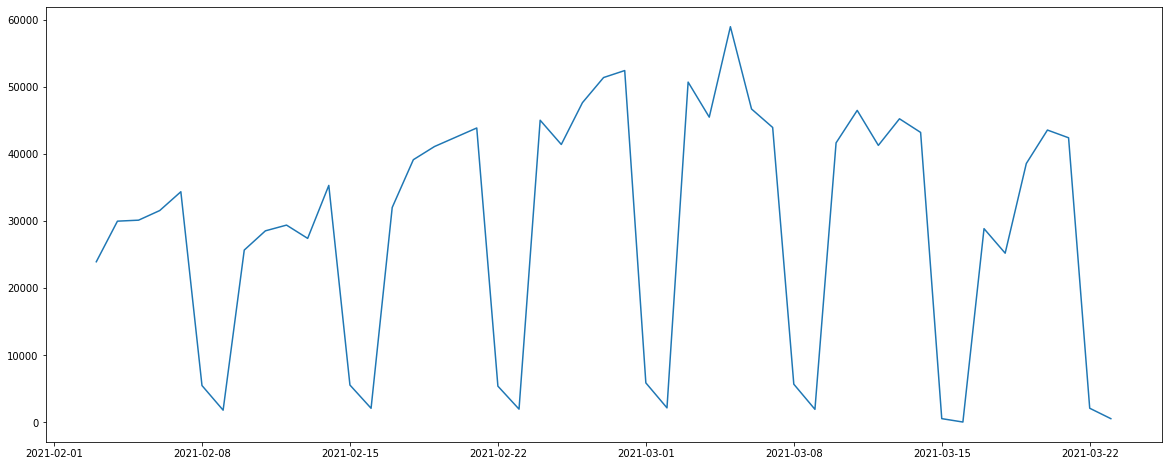

In [ ]:
x = pd.Series(visitor_by_date.index.values).apply(lambda s: datetime.strptime(s, '%Y-%m-%d').date())
y = visitor_by_date['count']
plt.rcParams['figure.figsize'] = (20,8)

plt.plot(x,y)
plt.show()

In [ ]:
train["event"].unique()

array([32, 35, 14, 38, 40, 10, 16,  2, 27, 33,  4, 39, 34, 28, 17, 30, 25,
       26,  9, 29,  6,  7,  8, 13,  5])

In [ ]:
train['event'].value_counts().nlargest(10)

14    672370
35    439438
38     88936
32     60297
40     59049
10     26496
16      9941
27      7034
33      6327
34      1885
Name: event, dtype: int64

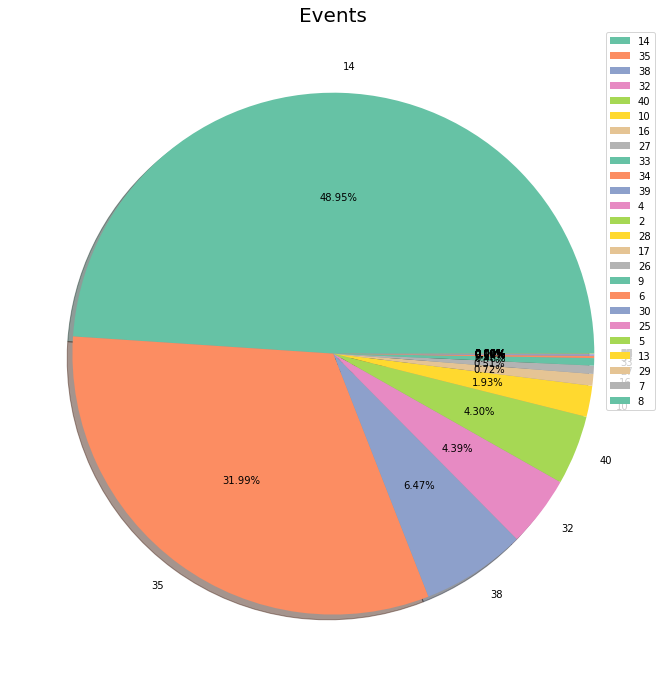

In [ ]:
labels =[14,  35,  38,  32,  40,  10,  16, 27, 33, 34, 39, 4, 2, 28, 17, 26, 9, 6, 30, 25, 5, 13, 29, 7, 8]
size = train['event'].value_counts()
colors = sns.color_palette('Set2')

plt.rcParams['figure.figsize'] = (12, 12)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Events', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [ ]:
hi train["eventdatetime"] = pd.to_datetime(train.eventdatetime)
train['day'] = train['eventdatetime'].dt.day
train['dayofweek'] = train['eventdatetime'].dt.dayofweek
train['hour'] = train['eventdatetime'].dt.hour
train['minute'] = train['eventdatetime'].dt.minute
train.head()

,eventdatetime,event,userid,useremaildomain,userrole,companyprofileid,country,day,dayofweek,hour,minute
0,2021-02-19 07:08:14,32,4323,1155,18,1354,3,19,4,7,8
1,2021-02-18 07:27:27,35,3890,200,18,138,3,18,3,7,27
2,2021-02-24 02:28:11,14,5004,1604,63,1869,3,24,2,2,28
3,2021-02-19 12:02:11,14,3040,853,15,973,3,19,4,12,2
4,2021-03-21 09:37:26,14,5177,201,18,702,3,21,6,9,37


In [ ]:
train.shape

(1373621, 11)

In [ ]:
train.groupby(train.userid).size().sort_values(ascending=False)

userid
6452    4500
3025    3980
3501    3595
5893    3532
6339    3390
        ... 
3905       3
465        3
6574       3
1136       2
4689       2
Length: 4251, dtype: int64

In [ ]:
train.isnull().sum()

eventdatetime       0
event               0
userid              0
useremaildomain     0
userrole            0
companyprofileid    0
country             0
day                 0
dayofweek           0
hour                0
minute              0
dtype: int64

In [ ]:
train.userid.unique()

array([4323, 3890, 5004, ..., 2652, 5175, 2258])

In [ ]:
len(train.userid.unique())

4251

In [ ]:
train['userid'].value_counts().nlargest(10)

6452    4500
3025    3980
3501    3595
5893    3532
6339    3390
1047    3296
6061    3089
2481    3085
4414    3042
1797    3004
Name: userid, dtype: int64

In [ ]:
train.userrole.unique()

array([18, 63, 15, 81, 61, 49,  5, 34,  7, 90, 35, 91, 80, 96, 57, 69, 54,
       84, 83, 77,  2, 12, 41,  4, 53, 21,  1, 28, 51, 73, 97, 60, 38, 40,
       85, 79, 45, 17,  3, 50, 26, 19, 82, 48, 88, 75, 52, 37, 33, 58, 87,
       89, 94, 31, 14, 67, 95, 65, 43, 56, 20, 16])

In [ ]:
len(train.userrole.unique())

62

In [ ]:
train['userrole'].value_counts().nlargest(12)

18    1298823
15      27286
7       12527
63       4867
34       2700
61       2458
5        2416
69       1661
28       1503
40       1445
54       1052
81       1013
Name: userrole, dtype: int64

In [ ]:
train.country.unique()

array([3, 9, 2, 4, 5])

In [ ]:
len(train.country.unique())

5

In [ ]:
train['country'].value_counts()

3    672292
9    425773
2    123422
4     90092
5     62042
Name: country, dtype: int64

In [ ]:
def Period(x):
    if (x >= 0) and (x <= 5):
        return 'Midnight'
    elif (x >= 6) and (x <= 11 ):
        return 'Morning'
    elif (x >= 12) and (x <= 17):
        return'Noon'
    elif (x >= 18) and (x <= 23) :
        return 'Night'

In [ ]:
train['Period'] = train['hour'].apply(Period)
train.head()

,eventdatetime,event,userid,useremaildomain,userrole,companyprofileid,country,day,dayofweek,hour,minute,Period
0,2021-02-19 07:08:14,32,4323,1155,18,1354,3,19,4,7,8,Morning
1,2021-02-18 07:27:27,35,3890,200,18,138,3,18,3,7,27,Morning
2,2021-02-24 02:28:11,14,5004,1604,63,1869,3,24,2,2,28,Midnight
3,2021-02-19 12:02:11,14,3040,853,15,973,3,19,4,12,2,Noon
4,2021-03-21 09:37:26,14,5177,201,18,702,3,21,6,9,37,Morning


In [ ]:
#Creating the test DataFrame and understanding it.
test = pd.read_csv('Test.csv')
test.head()

,UserID_Day_Month_Hour,eventdatetime,userid
0,User2910_Wed_3_18,2021-03-24 18:00:00,2910
1,User2784_Wed_3_12,2021-03-24 12:00:00,2784
2,User2290_Wed_3_6,2021-03-24 06:00:00,2290
3,User1720_Wed_3_6,2021-03-24 06:00:00,1720
4,User226_Wed_3_0,2021-03-24 00:00:00,226


In [ ]:
test.isnull().sum()

UserID_Day_Month_Hour    0
eventdatetime            0
userid                   0
dtype: int64

In [ ]:
test.userid.unique()

array([2910, 2784, 2290, ..., 4341, 1996, 3892])

In [ ]:
len(test.userid.unique())

4251

In [ ]:
test.shape

(17004, 3)

In [ ]:
test.isnull().sum()

UserID_Day_Month_Hour    0
eventdatetime            0
userid                   0
dtype: int64

In [ ]:
tmp_df = train.copy()
tmp_df.drop(["event","eventdatetime","companyprofileid","Period","day","dayofweek","hour","minute"],axis=1,inplace=True)
tmp_df.drop_duplicates(subset="userid",keep='first', inplace=True)
tmp_df.head()

,userid,useremaildomain,userrole,country
0,4323,1155,18,3
1,3890,200,18,3
2,5004,1604,63,3
3,3040,853,15,3
4,5177,201,18,3


In [ ]:
test = pd.merge(test, tmp_df, how='inner',  on=['userid'])

In [ ]:
test.head()

,UserID_Day_Month_Hour,eventdatetime,userid,useremaildomain,userrole,country
0,User2910_Wed_3_18,2021-03-24 18:00:00,2910,810,18,9
1,User2910_Wed_3_12,2021-03-24 12:00:00,2910,810,18,9
2,User2910_Wed_3_6,2021-03-24 06:00:00,2910,810,18,9
3,User2910_Wed_3_0,2021-03-24 00:00:00,2910,810,18,9
4,User2784_Wed_3_12,2021-03-24 12:00:00,2784,201,18,3


In [ ]:
test.shape

(17004, 6)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17004 entries, 0 to 17003
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   UserID_Day_Month_Hour  17004 non-null  object
 1   eventdatetime          17004 non-null  object
 2   userid                 17004 non-null  int64 
 3   useremaildomain        17004 non-null  int64 
 4   userrole               17004 non-null  int64 
 5   country                17004 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 929.9+ KB


In [ ]:
test["eventdatetime"] = pd.to_datetime(test.eventdatetime)
test['day'] = test['eventdatetime'].dt.day
test['dayofweek'] = test['eventdatetime'].dt.dayofweek
test['hour'] = test['eventdatetime'].dt.hour
test['minute'] =test['eventdatetime'].dt.minute
test.head()

,UserID_Day_Month_Hour,eventdatetime,userid,useremaildomain,userrole,country,day,dayofweek,hour,minute
0,User2910_Wed_3_18,2021-03-24 18:00:00,2910,810,18,9,24,2,18,0
1,User2910_Wed_3_12,2021-03-24 12:00:00,2910,810,18,9,24,2,12,0
2,User2910_Wed_3_6,2021-03-24 06:00:00,2910,810,18,9,24,2,6,0
3,User2910_Wed_3_0,2021-03-24 00:00:00,2910,810,18,9,24,2,0,0
4,User2784_Wed_3_12,2021-03-24 12:00:00,2784,201,18,3,24,2,12,0


In [ ]:
test['Period'] = test['hour'].apply(Period)
test.head()

,UserID_Day_Month_Hour,eventdatetime,userid,useremaildomain,userrole,country,day,dayofweek,hour,minute,Period
0,User2910_Wed_3_18,2021-03-24 18:00:00,2910,810,18,9,24,2,18,0,Night
1,User2910_Wed_3_12,2021-03-24 12:00:00,2910,810,18,9,24,2,12,0,Noon
2,User2910_Wed_3_6,2021-03-24 06:00:00,2910,810,18,9,24,2,6,0,Morning
3,User2910_Wed_3_0,2021-03-24 00:00:00,2910,810,18,9,24,2,0,0,Midnight
4,User2784_Wed_3_12,2021-03-24 12:00:00,2784,201,18,3,24,2,12,0,Noon


In [ ]:
test.to_csv("test_1.csv",index=True)

In [ ]:
#Creating the sample DataFrame and understanding it.
sample = pd.read_csv('SampleSubmission.csv')
sample.head()

,UserID_Day_Month_Hour,Target
0,User1_Wed_3_0,0
1,User1_Wed_3_6,0
2,User1_Wed_3_12,0
3,User1_Wed_3_18,0
4,User11_Wed_3_0,0


In [ ]:
asso = pd.DataFrame(train.groupby(["event","Period"]).size().sort_values(ascending=False))
asso.sort_values(["event"],inplace=True)
asso.head()

0
event Period       
2     Morning    79
      Noon       43
      Night       3
      Midnight    8
4     Morning   155

In [ ]:
asso.shape

(72, 1)

In [ ]:
asso.rename(columns = {0:'Total'}, inplace = True)
asso.head()

Total
event Period         
2     Morning      79
      Noon         43
      Night         3
      Midnight      8
4     Morning     155

In [ ]:
tmp_df = pd.DataFrame(asso["Total"].loc[32]) 
tmp_df.reset_index(level=0, inplace=True)
tmp_df.rename(columns = {"Total": "32"},inplace=True)
tmp_df

,Period,32
0,Morning,34466
1,Noon,21082
2,Midnight,3278
3,Night,1471


In [ ]:
tmp = pd.DataFrame(asso["Total"].loc[14]) 
tmp.reset_index(level=0, inplace=True)
tmp

,Period,Total
0,Night,16753
1,Midnight,33258
2,Noon,241687
3,Morning,380672


In [ ]:
train.event.unique()

array([32, 35, 14, 38, 40, 10, 16,  2, 27, 33,  4, 39, 34, 28, 17, 30, 25,
       26,  9, 29,  6,  7,  8, 13,  5])

In [ ]:
len(train.event.unique())

25

In [ ]:
def newTable():
  arr_ev = train.event.unique()
  arr_ev.sort()
  test = pd.DataFrame({"Period":["Midnight","Morning","Noon","Night"]})
  for i in range (0,25):
    tmp_df = pd.DataFrame(asso["Total"].loc[arr_ev[i]]) 
    tmp_df.reset_index(level=0, inplace=True)
    tmp_df.rename(columns = {"Total": "_".join(["e", str(arr_ev[i])])},inplace=True)
    test = pd.merge(test,tmp_df,on="Period",how="outer")
  test = test.fillna(0)  
  return test

In [ ]:
chi2 = newTable()
chi2.drop("Period",axis=1,inplace=True)
chi2

,e_2,e_4,e_5,e_6,e_7,e_8,e_9,e_10,e_13,e_14,...,e_28,e_29,e_30,e_32,e_33,e_34,e_35,e_38,e_39,e_40
0,8,17.0,0.0,0.0,0.0,0.0,0.0,1909,0.0,33258,...,21.0,0.0,1.0,3278,225,421,50881,5556,135,2412
1,79,155.0,1.0,4.0,0.0,1.0,0.0,15800,1.0,380672,...,60.0,1.0,2.0,34466,3748,1003,252675,52769,749,36211
2,43,77.0,2.0,0.0,1.0,0.0,4.0,8113,1.0,241687,...,19.0,0.0,0.0,21082,2170,444,124921,28606,417,19296
3,3,0.0,0.0,0.0,0.0,0.0,0.0,674,0.0,16753,...,0.0,0.0,0.0,1471,184,17,10961,2005,4,1130


In [ ]:
chi2.rename(index = {0: "Midnight",1:"Morning",2:"Noon",3:"Night"}, inplace = True)
chi2.head().transpose()

,Midnight,Morning,Noon,Night
e_2,8.0,79.0,43.0,3.0
e_4,17.0,155.0,77.0,0.0
e_5,0.0,1.0,2.0,0.0
e_6,0.0,4.0,0.0,0.0
e_7,0.0,0.0,1.0,0.0
e_8,0.0,1.0,0.0,0.0
e_9,0.0,0.0,4.0,0.0
e_10,1909.0,15800.0,8113.0,674.0
e_13,0.0,1.0,1.0,0.0
e_14,33258.0,380672.0,241687.0,16753.0


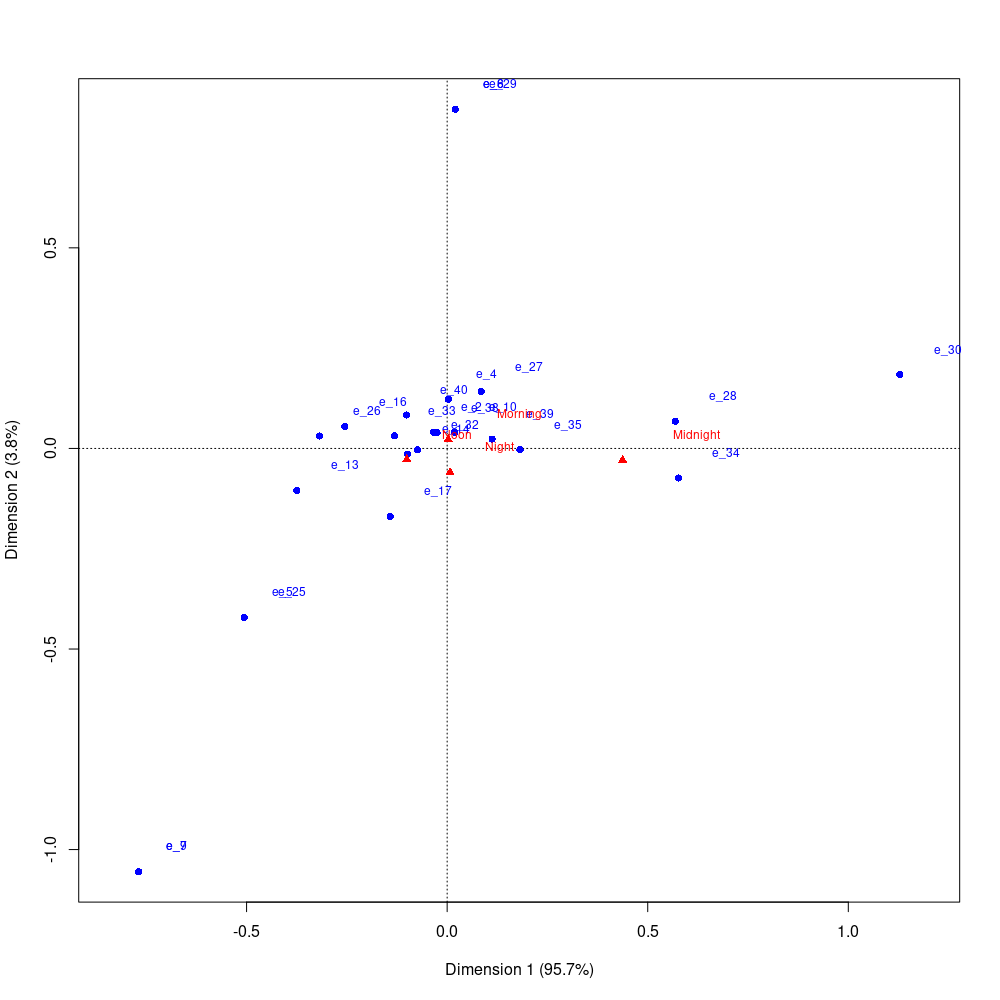

In [ ]:
chi2.to_csv("chi2_test.csv",index=True,index_label="Events")

In [ ]:
event_14 = train.loc[train['event'] == 14]
event_14.head()

,eventdatetime,event,userid,useremaildomain,userrole,companyprofileid,country,day,dayofweek,hour,minute,Period
2,2021-02-24 02:28:11,14,5004,1604,63,1869,3,24,2,2,28,Midnight
3,2021-02-19 12:02:11,14,3040,853,15,973,3,19,4,12,2,Noon
4,2021-03-21 09:37:26,14,5177,201,18,702,3,21,6,9,37,Morning
5,2021-03-07 07:43:18,14,1807,456,18,1525,3,7,6,7,43,Morning
6,2021-03-11 09:53:05,14,4496,1803,18,1528,3,11,3,9,53,Morning


In [ ]:
event_14.groupby(event_14.userid).size()

userid
1        57
5        34
9       343
10      175
11      267
       ... 
6717    120
6718    320
6719    257
6720    200
6721      5
Length: 3464, dtype: int64

In [ ]:
chi_df = pd.DataFrame(event_14.groupby(["userid","Period"]).size().sort_values(ascending=False))

In [ ]:
chi_df.sort_values(["userid"],inplace=True)
chi_df.head()

0
userid Period     
1      Night    10
       Noon     19
       Morning  28
5      Morning  15
       Noon     19

In [ ]:
chi_df.rename(columns = {0:'Total'}, inplace = True)
chi_df.head()

Total
userid Period        
1      Night       10
       Noon        19
       Morning     28
5      Morning     15
       Noon        19

In [ ]:
df = pd.DataFrame(chi_df["Total"].loc[5]) 
df.reset_index(level=0, inplace=True)
df

,Period,Total
0,Morning,15
1,Noon,19


In [ ]:
event_14.userid.unique()

array([5004, 3040, 5177, ..., 1069, 2258, 2388])

In [ ]:
len(event_14.userid.unique())

3464

In [ ]:
def newTable_14():
  arr_np = event_14.userid.unique()
  test_14 = pd.DataFrame({"Period":["Midnight","Morning","Noon","Night"]})
  for i in range (len(event_14.userid.unique())):
    df = pd.DataFrame(chi_df["Total"].loc[arr_np[i]]) 
    df.reset_index(level=0, inplace=True)
    df.rename(columns = {"Total": "_".join(["id", str(arr_np[i])])},inplace=True)
    test_14 = pd.merge(test_14,df,on="Period",how="outer")
  test_14 = test_14.fillna(0)  
  return test_14

In [ ]:
chi2_14 = newTable_14()
chi2_14.drop("Period",axis=1,inplace=True)
chi2_14

,id_5004,id_3040,id_5177,id_1807,id_4496,id_2223,id_2274,id_2215,id_1451,id_3003,...,id_4293,id_119,id_3616,id_3795,id_3561,id_3382,id_4729,id_1069,id_2258,id_2388
0,331,8,17,0.0,0.0,58.0,131.0,17,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
1,558,76,980,36.0,517.0,247.0,221.0,74,122.0,174.0,...,2.0,0.0,1.0,3.0,2.0,0.0,0.0,1.0,0.0,1.0
2,90,67,416,3.0,222.0,208.0,31.0,119,182.0,115.0,...,0.0,4.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,20,5,2,0.0,0.0,0.0,0.0,3,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
chi2_14.rename(index = {0: "Midnight",1:"Morning",2:"Noon",3:"Night"}, inplace = True)
chi2_14.head().transpose()

,Midnight,Morning,Noon,Night
id_5004,331.0,558.0,90.0,20.0
id_3040,8.0,76.0,67.0,5.0
id_5177,17.0,980.0,416.0,2.0
id_1807,0.0,36.0,3.0,0.0
id_4496,0.0,517.0,222.0,0.0
...,...,...,...,...
id_3382,2.0,0.0,0.0,0.0
id_4729,0.0,0.0,1.0,0.0
id_1069,0.0,1.0,0.0,0.0
id_2258,0.0,0.0,1.0,0.0


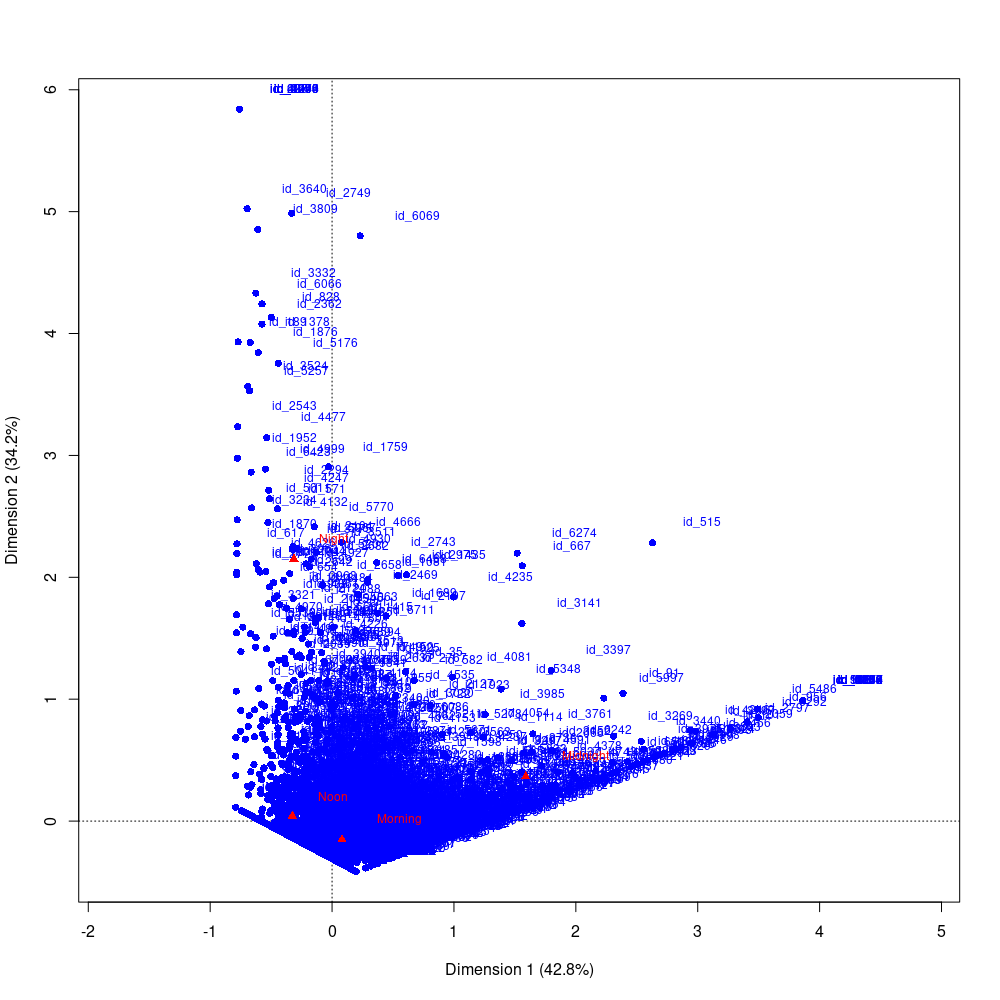

In [ ]:
chi2_14.to_csv("chi2_test_14.csv",index=True,index_label="Userid")

In [ ]:
train['date'] = train['eventdatetime'].dt.date
ex_df = pd.DataFrame(train.groupby(["userid","date","Period","event"]).size().sort_values(ascending=False))
ex_df.sort_values(["userid","date"],inplace=True)
ex_df.rename(columns = {0:'Total'}, inplace = True)
ex_df.head()

Total
userid date       Period  event       
1      2021-02-03 Noon    38        14
                  Morning 38        11
                  Noon    14         6
       2021-02-04 Morning 35         9
                  Noon    40         6

In [ ]:
au = pd.DataFrame(ex_df["Total"].loc[1]) 
au.reset_index(level=['date','Period', 'event'], inplace=True)
au.head()

,date,Period,event,Total
0,2021-02-03,Noon,38,14
1,2021-02-03,Morning,38,11
2,2021-02-03,Noon,14,6
3,2021-02-04,Morning,35,9
4,2021-02-04,Noon,40,6


In [ ]:
train.to_csv("train_df.csv",index=False)

In [ ]:
test.to_csv("test_df.csv",index=False)